In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [13]:
# Load dataset
gastos_diretos = pd.read_csv('../databases/gastosdiretos_clean.csv', encoding='latin1')

In [14]:
X = gastos_diretos[['ORCAMENTO_INICIAL_R$']].values
y = gastos_diretos['ORCAMENTO_REALIZADO_R$'].values


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

lin_regr = linear_model.LinearRegression()
lin_regr.fit(X_train, y_train)

y_pred = lin_regr.predict(X_test)

print(f'Coeficiente: {lin_regr.coef_[0]:.2f}')
print(f'Intercepto: {lin_regr.intercept_:.2f}')
print(f'Erro quadrático médio: {mean_squared_error(y_test, y_pred):.2f}')
print(f'R²: {r2_score(y_test, y_pred):.2f}')

Coeficiente: 0.55
Intercepto: 11980490.15
Erro quadrático médio: 5012330943367680000.00
R²: 0.83


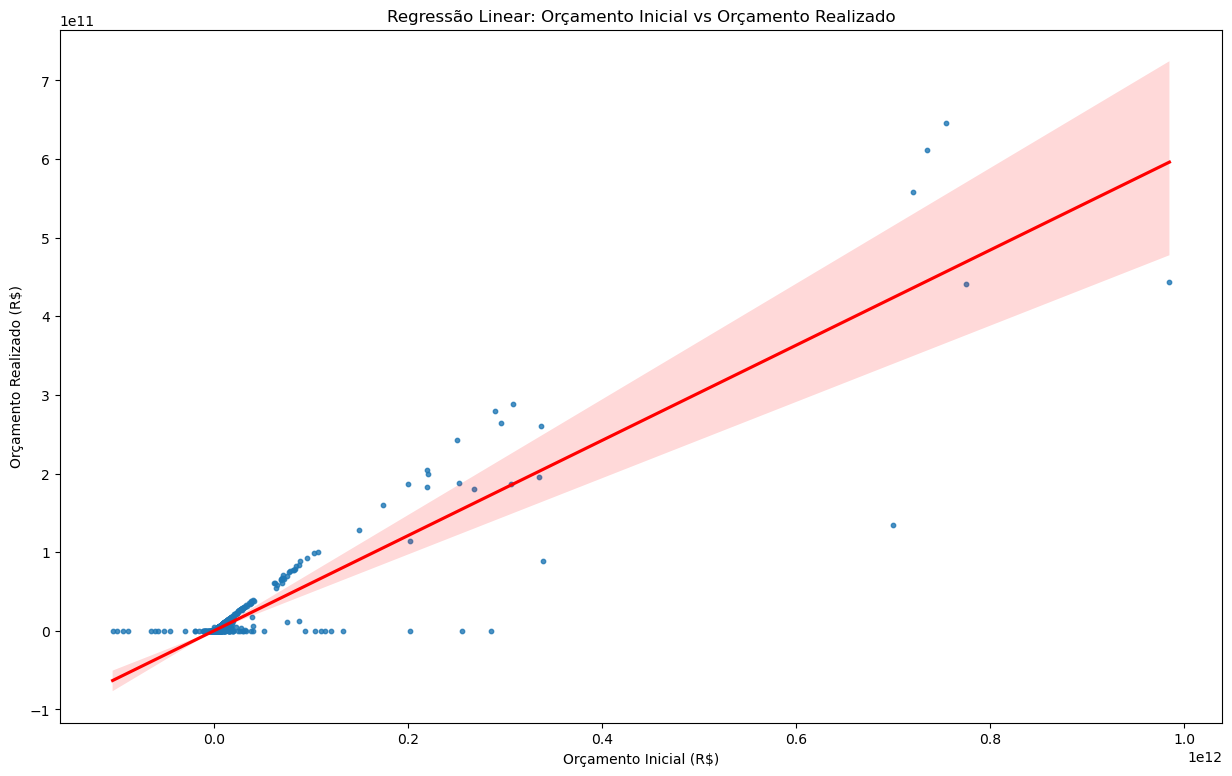

In [15]:
plt.figure(figsize=(15.0, 9.0))
sns.regplot(x='ORCAMENTO_INICIAL_R$', y='ORCAMENTO_REALIZADO_R$', data=gastos_diretos, scatter_kws={'s':10}, line_kws={'color':'red'})
plt.title('Regressão Linear: Orçamento Inicial vs Orçamento Realizado')
plt.xlabel('Orçamento Inicial (R$)')
plt.ylabel('Orçamento Realizado (R$)')
plt.savefig('../resultados/regressao.png', bbox_inches='tight')
plt.show()